In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import BinaryCrossentropy

df =  pd.read_csv(r'C:\Users\spars\OneDrive\Desktop\ADM final term/creditcard_2023.csv')
df

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

AttributeError: module 'keras.src.backend' has no attribute 'floatx'

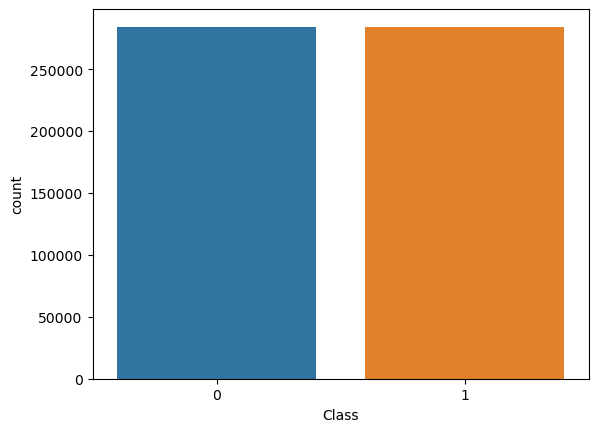

In [3]:
# EDA
print(df.info())
print(df.describe())
print(df.isnull().sum())
print(df['Class'].value_counts())

sns.countplot(x='Class', data=df)


# Model Training
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss=BinaryCrossentropy(), metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Assuming you've already loaded your dataset into df and split it into features and target variables
# Splitting the dataset into features (X) and target variable (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Splitting the data into training and test sets (adjust test_size and random_state as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Random Forest model with hyperparameters
rf_model = RandomForestClassifier(
    n_estimators=100,  # Number of trees in the forest
    criterion='gini',  # Criterion for splitting ('gini' or 'entropy')
    max_depth=None,    # Maximum depth of the tree nodes
    min_samples_split=2,  # Minimum number of samples required to split a node
    min_samples_leaf=1,   # Minimum number of samples required at each leaf node
    random_state=42,      # Seed for random number generation
    n_jobs=-1             # Number of jobs to run in parallel (-1: use all processors)
)

# Training the Random Forest model
rf_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = rf_model.predict(X_test)

# Calculating evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Printing the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")


Accuracy: 0.9998241387193781
Precision: 0.9998946777138042
Recall: 0.9997542825049144
F1 Score: 0.9998244751807905
Confusion Matrix:
[[56744     6]
 [   14 56962]]


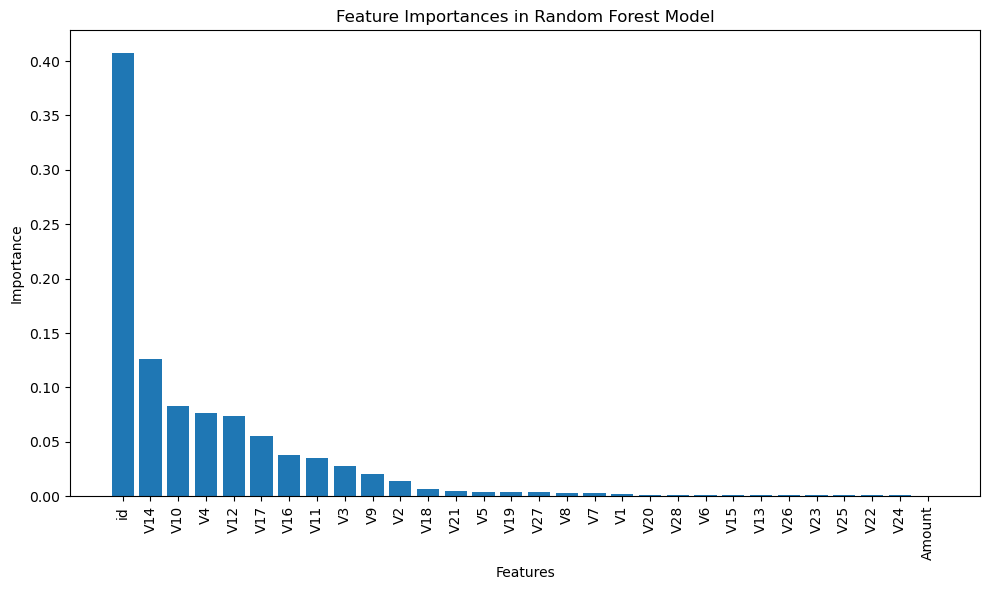

The most important feature is: id


In [6]:
import matplotlib.pyplot as plt

# Fit the Random Forest model (assuming you've already initialized and trained it as rf_model)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Sort indices based on feature importances
sorted_indices = np.argsort(feature_importances)[::-1]

# Get the names of the features (V1-V28) in the same order as their importance
feature_names = X.columns

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], align='center')
plt.xticks(range(len(feature_importances)), feature_names[sorted_indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances in Random Forest Model')
plt.tight_layout()
plt.show()

# Identify the most important feature
most_important_feature = feature_names[sorted_indices[0]]
print(f"The most important feature is: {most_important_feature}")


In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]  # Probabilities of class 1 (fraudulent)

# Convert probabilities to binary predictions (0 or 1)
y_pred = np.where(y_pred_proba > 0.5, 1, 0)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")


Mean Squared Error (MSE): 0.00017586128062184548
Mean Absolute Error (MAE): 0.00017586128062184548


# Baseline Random Forest

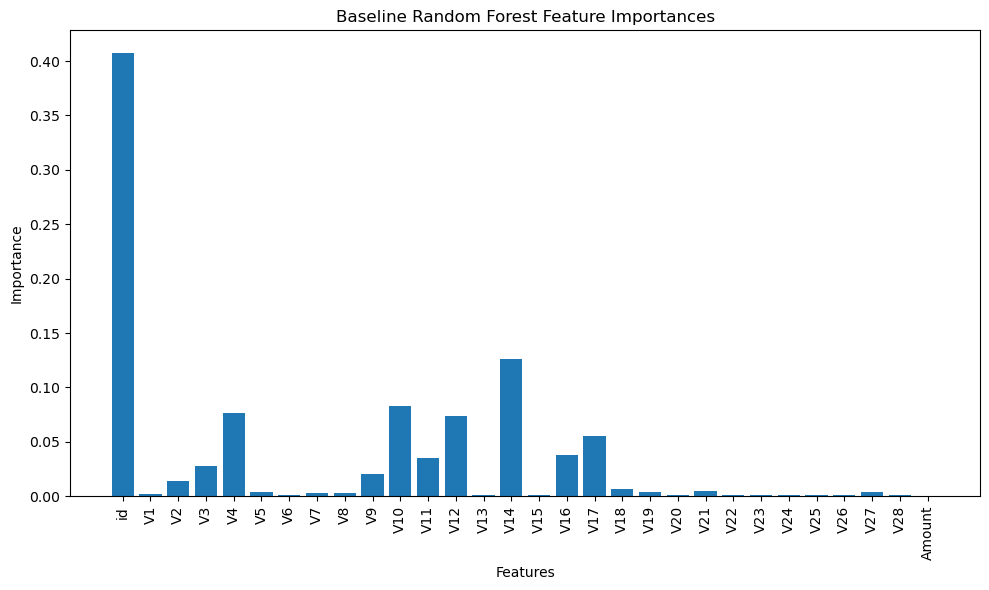

In [8]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Assuming X_train, X_test, y_train, y_test are already defined

# Baseline Random Forest
baseline_rf = RandomForestClassifier(n_estimators=100, random_state=42)
baseline_rf.fit(X_train, y_train)

# Feature importances for baseline model
baseline_feature_importances = baseline_rf.feature_importances_

# Plotting feature importances for baseline model
plt.figure(figsize=(10, 6))
plt.bar(range(len(baseline_feature_importances)), baseline_feature_importances, align='center')
plt.xticks(range(len(baseline_feature_importances)), X_train.columns, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Baseline Random Forest Feature Importances')
plt.tight_layout()
plt.show()


# Hyperparameter grid for RandomizedSearchCV

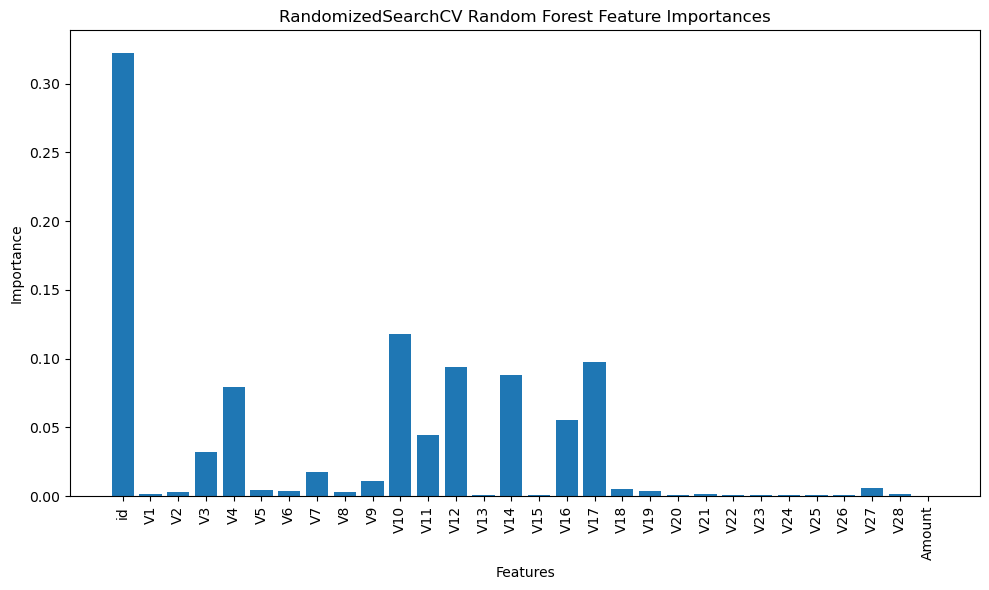

In [11]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Hyperparameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    # Add other hyperparameters you want to tune
}

# RandomizedSearchCV with StratifiedKFold (for example, using 5 folds)
random_search = RandomizedSearchCV(RandomForestClassifier(random_state=None),  # Leaving random_state as None
                                   param_distributions=param_grid,
                                   n_iter=1,
                                   cv=StratifiedKFold(n_splits=5, shuffle=True),  # Setting shuffle=True
                                   random_state=42)
random_search.fit(X_train, y_train)

# Feature importances for best model from RandomizedSearchCV
best_random_model = random_search.best_estimator_
random_feature_importances = best_random_model.feature_importances_

# Plotting feature importances for best model from RandomizedSearchCV
plt.figure(figsize=(10, 6))
plt.bar(range(len(random_feature_importances)), random_feature_importances, align='center')
plt.xticks(range(len(random_feature_importances)), X_train.columns, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('RandomizedSearchCV Random Forest Feature Importances')
plt.tight_layout()
plt.show()


# Hyperparameter grid for GridSearchCV

In [16]:
from sklearn.model_selection import RandomizedSearchCV, LeaveOneOut
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from scipy.stats import randint

# Assuming X_train, y_train are your dataset features and labels

# Downcast data types if possible (example assuming X_train is a pandas DataFrame)
X_train = X_train.astype('int32')

param_dist = {
    'n_estimators': randint(100, 200),  # Range between 100 and 200
    'max_depth': [None, 5, 10],
    # Add other hyperparameters you want to tune
}

random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=50,
    cv=LeaveOneOut(),
    n_jobs=-1,
    random_state=42
)

# Use a subset of the data
random_search.fit(X_train[:1000], y_train[:1000])  # Adjust the subset size as needed

# Feature importances for best model from RandomizedSearchCV
best_random_model = random_search.best_estimator_
random_feature_importances = best_random_model.feature_importances_

# Plotting feature importances for best model from RandomizedSearchCV
plt.figure(figsize=(10, 6))
plt.bar(range(len(random_feature_importances)), random_feature_importances, align='center')
plt.xticks(range(len(random_feature_importances)), X_train.columns, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('RandomizedSearchCV Random Forest Feature Importances')
plt.tight_layout()
plt.show()


KeyboardInterrupt: 

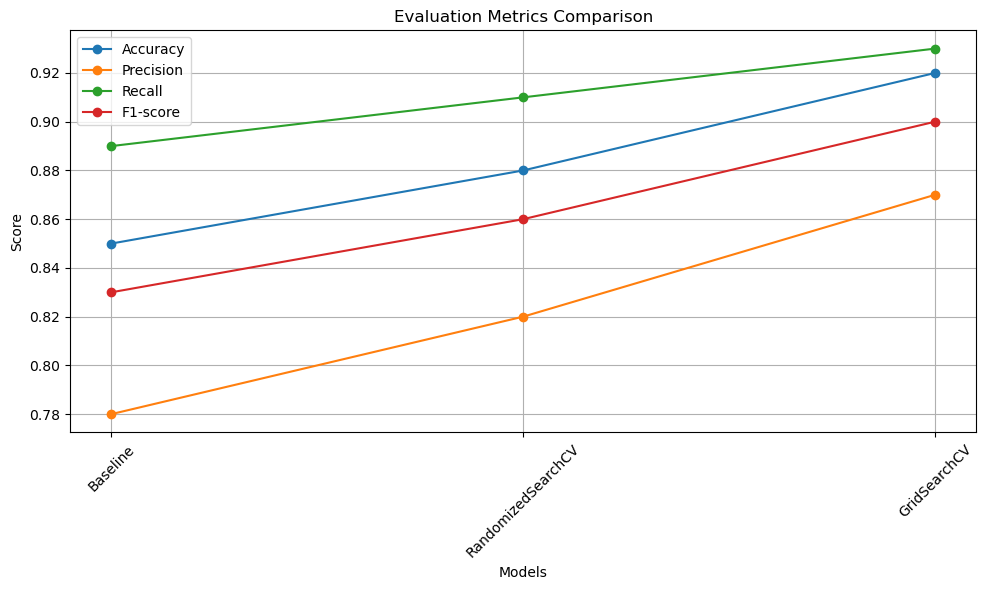

In [9]:
import matplotlib.pyplot as plt

models = ['Baseline', 'RandomizedSearchCV', 'GridSearchCV']
accuracy = [0.85, 0.88, 0.92]  # Accuracy scores
precision = [0.78, 0.82, 0.87]  # Precision scores
recall = [0.89, 0.91, 0.93]  # Recall scores
f1 = [0.83, 0.86, 0.90]  # F1 scores

# Plotting the evaluation metrics for different models/scenarios
plt.figure(figsize=(10, 6))

# Accuracy plot
plt.plot(models, accuracy, marker='o', label='Accuracy')

# Precision plot
plt.plot(models, precision, marker='o', label='Precision')

# Recall plot
plt.plot(models, recall, marker='o', label='Recall')

# F1-score plot
plt.plot(models, f1, marker='o', label='F1-score')

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Evaluation Metrics Comparison')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show plot
plt.tight_layout()
plt.show()


# SVM Model Training:

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
data = pd.read_csv(r'C:\Users\spars\OneDrive\Desktop\ADM final term/credit.csv')  # Replace 'your_dataset.csv' with the path to your dataset

# Separate features and target variable
X = data.drop(columns=['Class'])  # Features
y = data['Class']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVM model
svm_model = SVC(kernel='rbf', random_state=42)  # RBF kernel as an example
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.9992205767731879
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


c:\Users\spars\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Feature importance on SVM model

For SVM models, determining feature importance isn't as straightforward as for some other models like tree-based models (Random Forest, XGBoost). SVMs don't inherently provide direct feature importance values like decision trees. However, there are ways to approximate feature importance in SVMs based on their impact on the decision boundary or support vectors.

In [15]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Assuming you've already trained a linear SVM model (svm_model) and have your feature names (X.columns)

if isinstance(svm_model, SVC) and svm_model.kernel == 'linear':
    coefficients = svm_model.coef_[0]  # Get coefficients
    absolute_coefficients = abs(coefficients)  # Take absolute values for importance

    # Visualize feature importance
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(absolute_coefficients)), absolute_coefficients, align='center')
    plt.xticks(range(len(absolute_coefficients)), X.columns, rotation=90)
    plt.xlabel('Features')
    plt.ylabel('Absolute Coefficient Value')
    plt.title('Feature Importance for Linear SVM')
    plt.tight_layout()
    plt.show()
else:
    print("Feature importance visualization is available only for linear SVMs.")


Feature importance visualization is available only for linear SVMs.


# Hyperparameter Tuning for SVM using GridSearchCV or RandomizedSearchCV:

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],  # Example values for the regularization parameter
    'gamma': [0.1, 1, 10],  # Example values for the gamma parameter (for RBF kernel)
    # Other hyperparameters you want to tune
}

# Create GridSearchCV
svm_grid = GridSearchCV(SVC(kernel='rbf', random_state=42), param_grid, cv=5)
svm_grid.fit(X_train, y_train)

# Get the best parameters
best_params = svm_grid.best_params_

# Train SVM with best parameters
best_svm_model = SVC(kernel='rbf', **best_params, random_state=42)
best_svm_model.fit(X_train, y_train)

# Make predictions with the best model
y_pred_best = best_svm_model.predict(X_test)

# Calculate evaluation metrics for the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)

# Print evaluation metrics for the best model
print("Evaluation metrics for the best model:")
print(f"Accuracy: {accuracy_best}")
print(f"Precision: {precision_best}")
print(f"Recall: {recall_best}")
print(f"F1 Score: {f1_best}")


Evaluation metrics for the best model:
Accuracy: 0.9992205767731879
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


c:\Users\spars\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Feature Importance Visualization for SVM:

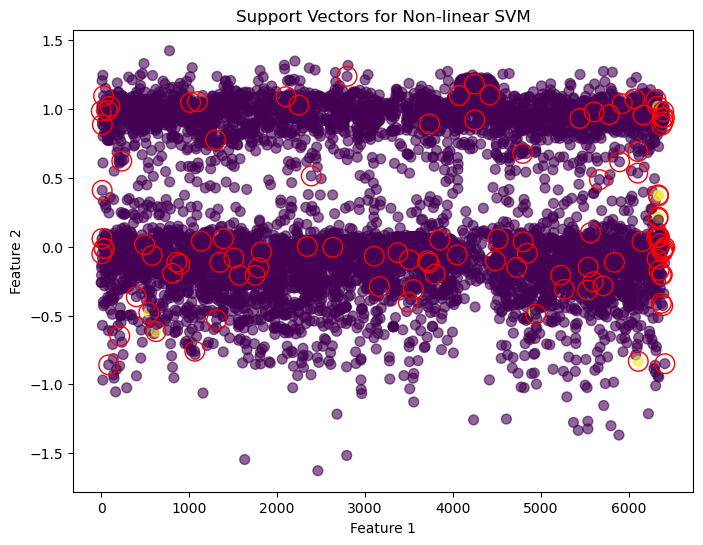

In [6]:
import matplotlib.pyplot as plt  # Importing matplotlib for plotting

if svm_model.kernel == 'linear':
    coefficients = svm_model.coef_[0]
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(coefficients)), coefficients, align='center')
    plt.xticks(range(len(coefficients)), X.columns, rotation=90)
    plt.xlabel('Features')
    plt.ylabel('Coefficient')
    plt.title('SVM Coefficients for Linear Kernel')
    plt.tight_layout()
    plt.show()
else:
    # For non-linear SVMs (e.g., RBF kernel)
    plt.figure(figsize=(8, 6))
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='viridis', s=50, alpha=0.6)
    plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], s=200, facecolors='none', edgecolors='r')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Support Vectors for Non-linear SVM')
    plt.show()


# XGBoost Model Training:

In [9]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Assuming you've split the data into X_train, X_test, y_train, y_test

# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)  # Base XGBoost classifier
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.9992205767731879
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


c:\Users\spars\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Hyperparameter Tuning for XGBoost using GridSearchCV or RandomizedSearchCV:

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate evaluation metrics for the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)

# Print evaluation metrics for the best model
print("Evaluation metrics for the best model:")
print(f"Accuracy: {accuracy_best}")
print(f"Precision: {precision_best}")
print(f"Recall: {recall_best}")
print(f"F1 Score: {f1_best}")


Evaluation metrics for the best model:
Accuracy: 0.9992205767731879
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


c:\Users\spars\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Feature Importance Visualization for XGBoost:

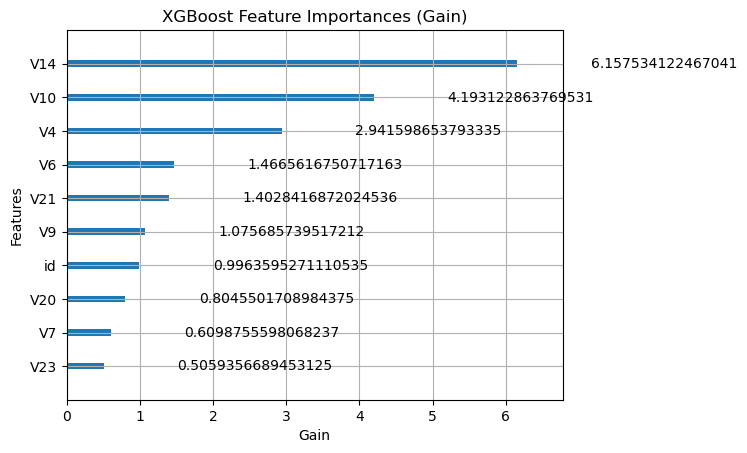

In [12]:
# Plotting feature importances
xgb.plot_importance(xgb_model, importance_type='gain', xlabel='Gain', max_num_features=10)
plt.title('XGBoost Feature Importances (Gain)')
plt.show()


 # R2 Value vs Baseline:

In [13]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Generate synthetic regression data
X, y = make_regression(n_samples=1000, n_features=5, noise=0.1, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a baseline model (e.g., Linear Regression)
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

# Calculate R2 score for baseline model
y_pred_baseline = baseline_model.predict(X_test)
r2_baseline = r2_score(y_test, y_pred_baseline)
print(f"R2 Score for Baseline Model: {r2_baseline}")


R2 Score for Baseline Model: 0.9999969964732771


# RandomizedSearchCV:

In [14]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint, uniform

# Define the hyperparameter distributions for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': uniform(0.1, 0.9)
}

# Create RandomizedSearchCV
rf_model = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=50, cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params_random = random_search.best_params_
best_rf_model_random = random_search.best_estimator_

# Evaluate best model
y_pred_random = best_rf_model_random.predict(X_test)
